In [1]:
from growth_rate import compute_growth_rate_classified, compute_instantaneous_growth_rate_classified, compute_instantaneous_growth_rate, correct_volume_time_series
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter, medfilt

In [2]:
filemap_path = "/mnt/external.data/TowbinLab/spsalmon/pipeline_test_folder/analysis/report/analysis_filemap.csv"
filemap = pd.read_csv(filemap_path)

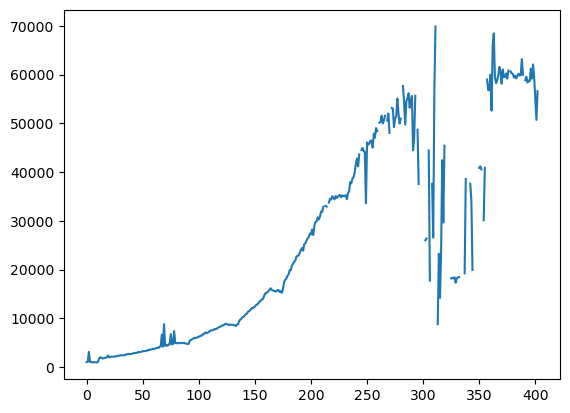

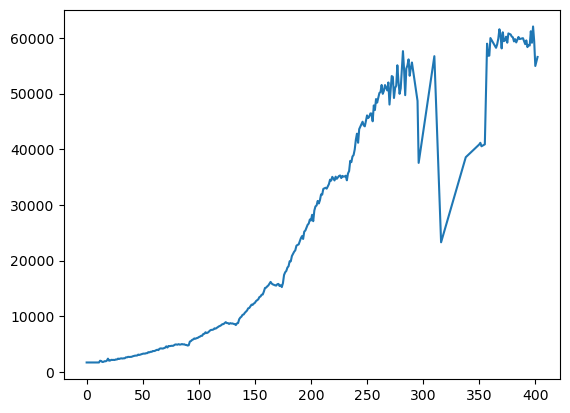

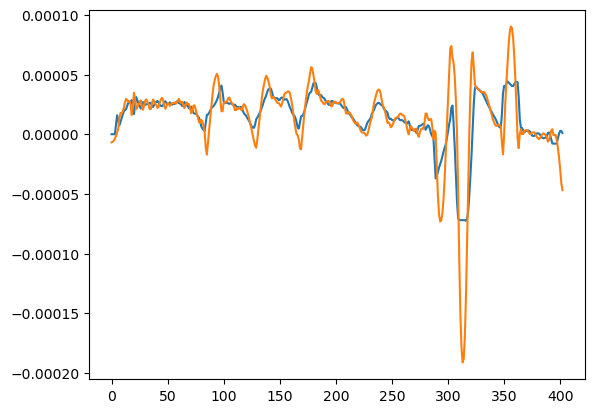

In [7]:
volume = filemap['ch2_seg_str_area'].to_numpy()
time = filemap['ExperimentTime'].to_numpy()
classification = filemap['ch2_seg_str_worm_type'].to_numpy()

hatch = int(filemap['HatchTime'].iloc[0])
m4 = int(filemap['M4'].iloc[0])

# volume = volume[hatch:m4]
# time = time[hatch:m4]
# classification = classification[hatch:m4]

plt.plot(volume)
plt.show()
volume = correct_volume_time_series(volume, classification)
plt.plot(volume)
plt.show()

volume = np.log(volume)

instant = compute_instantaneous_growth_rate(volume, time, smoothing_method="moving_average")
plt.plot(instant)
instant = compute_instantaneous_growth_rate(volume, time, smoothing_method="savgol")
plt.plot(instant)
plt.show()

In [4]:
diff = np.diff(log_volume_l1)/np.diff(time_l1)
plt.plot(time_l1[:-1], diff)
plt.show()
print(np.mean(diff))
print(np.median(diff))

NameError: name 'log_volume_l1' is not defined